Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026

Branch: AI-ML A1

###**Aim:**
To implement the Hough Transform algorithm for detecting lines and circles in an image and analyze its applications in computer vision.

###**Objectives:**
1. To understand the mathematical foundation of the Hough Transform.
2. To apply the Circular Hough Transform for detecting circles in an image.
3. To evaluate the performance of the Hough Transform in different image conditions.
4. To explore real-world applications of the Hough Transform in edge and shape detection.

###**Theory:**

The Hough Transform is a feature extraction technique used in image processing to detect geometric shapes such as lines and circles. It converts image space into a parameter space where shapes can be identified based on accumulations of points.

Each edge pixel in an image contributes to a sinusoidal curve in Hough space, and intersections of these curves indicate the presence of a line.

Probabilistic Hough Transform
This is an optimized version of the standard Hough Transform that selects a random subset of edge points to reduce computational complexity while still accurately detecting lines.

The Circular Hough Transform maps edge points to a 3D accumulator space (a, b, r), where peaks represent potential circles.

**A. Hough Transform from Scratch:**

In [1]:
#Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.color import rgb2gray

# Load the grayscale image
image = cv2.imread("/content/Coins_Exp3.png", cv2.IMREAD_GRAYSCALE)

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    image = cv2.resize(image, (300, 300))  # Resize the Image

Error: Could not load image. Please check the file path.


In [2]:
#Function to display images

def display_image(image,title="Image",cmap=None):
  plt.figure(figsize=(10,10))
  if cmap:
    plt.imshow(image,cmap=cmap)
  else:
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.axis('off')
  plt.show()

In [3]:
def hough_circle_accumulator(edges,radius):
  rows,cols = edges.shape
  accumulator = np.zeros((rows,cols),dtype=np.int32)

  #Get Edge Points
  edge_points = np.argwhere(edges)
  for x,y in edge_points:
    for theta in range(0,360):
      angle = np.deg2rad(theta)
      a = int(x - radius * np.cos(angle))
      b = int(y - radius * np.sin(angle))
      if 0<=a<rows and 0<=b<cols:
        accumulator[a,b]+=1

    return accumulator


In [4]:
#Circle Detection Function

def detect_circles(image,min_radius,max_radius,threshold):

  edges = canny(image,sigma=1.5) #Use Canny Edge Detection
  detected_circles= []
  for radius in range(min_radius,max_radius+1):
    accumulator = hough_circle_accumulator(edges,radius)
    #Threshold the accumulator to find circle centres
    centers = np.argwhere(accumulator>threshold)

    for center in centers: #centers is a list
      detected_circles.append((center[0],center[1],radius)) #Append tuples to the list detected_circles

  return detected_circles



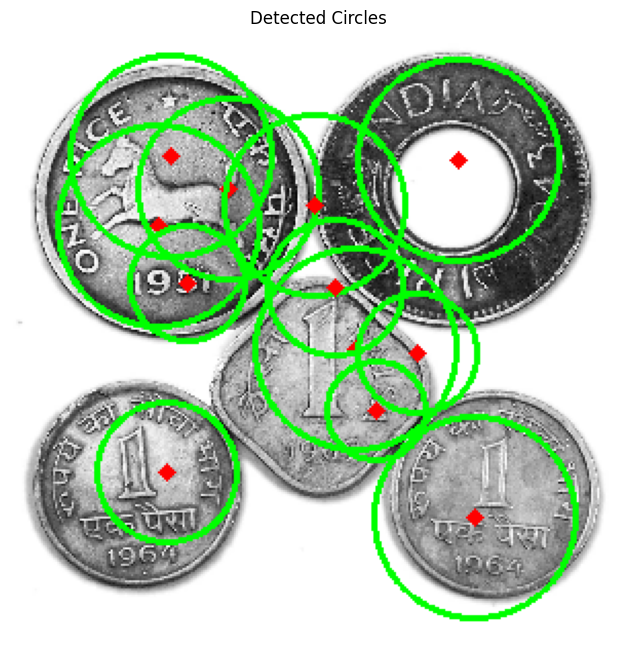

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to detect circles using Hough Circle Transform
def detect_circles(image, min_radius, max_radius, threshold):
    # Use HoughCircles to detect circles
    circles = cv2.HoughCircles(
        image,
        cv2.HOUGH_GRADIENT,
        dp=0.8,
        minDist=30,
        param1=threshold,
        param2=30,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    # Ensure circles are returned as integers and not None
    if circles is not None:
        circles = np.uint16(np.around(circles))  # Round and convert to integer
        return circles[0, :]  # Return the detected circles
    else:
        return []  # Return an empty list if no circles are found

# Function to display the image with matplotlib
def display_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load the grayscale image
image = cv2.imread("/content/Coins_Exp3_3.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (300, 300))  # Resize the Image

# Run Circle Detection
min_radius = 20
max_radius = 50
threshold = 150
circles = detect_circles(image, min_radius, max_radius, threshold)

# Display detected circles
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if circles.size > 0:  # Check if any circles were detected by checking the size of the array
    for x, y, r in circles:
        cv2.circle(output_image, (y, x), r, (0, 255, 0), 2)  # Draw the circle
        cv2.circle(output_image, (y, x), 2, (0, 0, 255), 3)  # Mark the center
else:
    print("No circles were detected.")

# Show the result
display_image(output_image, "Detected Circles")


B. Hough Transform using Functions

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [7]:
#Function to download and read images

def download_and_read_image(url,save_as):
    try:
      if not os.path.exists(save_as):
        urrlib.request.urlretrieve(url,save_as)
      return cv2.imread(save_as)
    except urllib.error.HTTPError as e:
      print(f"Error downloading image: {e}")
      #Return None or a default image if the download fails
      return None
    except Exception as e:
      print(f"An error occurred during download: {e}")
      return None

    #Function to display images

    def display_image(image,title="Image",cmap=None):
      plt.figure(figsize=(10,10))
      if cmap:
        plt.imshow(image,cmap=cmap)
      else:
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.axis('off')
      plt.show()


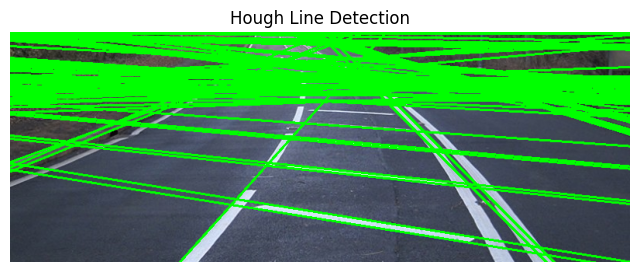

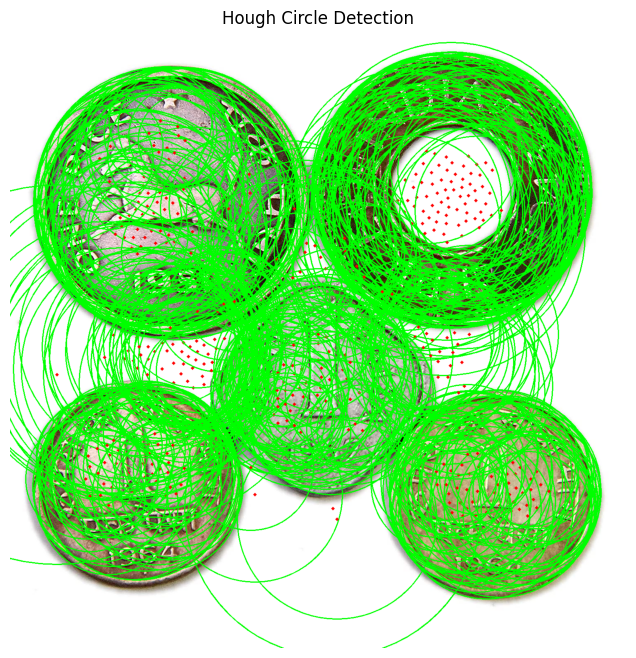

In [11]:
# Download sample image for line detection
line_image_url = "/content/HighwayRoadLines.jpg"
line_image_path = "/content/HighwayRoadLines.jpg"
line_image = download_and_read_image(line_image_url, line_image_path)

# Check if image loading was successful before proceeding
if line_image is not None:
    # Convert image to grayscale for processing
    gray_line_image = cv2.cvtColor(line_image, cv2.COLOR_BGR2GRAY)

    # Apply Canny Edge Detection
    edges = cv2.Canny(gray_line_image, 50, 150, apertureSize=3)

    # Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

    # Draw the lines on the original image
    line_image_copy = line_image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)

        display_image(line_image_copy, "Hough Line Detection")
    else:
        print("Error: No lines detected.")
else:
    print("Error: Line detection skipped because image loading failed.")

# Download sample image for circle detection
circle_image_url = "/content/Coins_Exp3_3.jpg"
circle_image_path = "/content/Coins_Exp3_3.jpg"
circle_image = download_and_read_image(circle_image_url, circle_image_path)

# Check if image loading was successful before proceeding
if circle_image is not None:
    # Convert image to grayscale for processing
    gray_scale_image = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred_circle_image = cv2.GaussianBlur(gray_scale_image, (9, 9), 2)

    # Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred_circle_image,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=20,
        param1=50,
        param2=150,
        minRadius=0,
        maxRadius=0
    )

    # Check and draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

        display_image(circle_image, "Hough Circle Detection")
    else:
        print("No circles detected.")
else:
    print("Error: Circle detection skipped because image loading failed.")


###**Conclusion:**

The Hough Transform is a powerful tool for detecting lines and circles in images, providing robustness against noise and partial occlusions. Circular Hough Transform extends the concept to curved shapes, enabling applications in object recognition, medical imaging, and autonomous driving.

Applications of Hough Transform:

1. Line Detection: Used to identify straight lines in road lane detection, document analysis, and CAD.
2. Circle Detection: Applied to detect circular objects like coins, traffic signs, or microscopic cells.
3. Ellipse Detection: Used in biometrics (e.g., iris recognition) and industrial inspections.
4. Medical Imaging: Helps in detecting tumors, blood vessels, or other structures in medical scans.
5. Astronomy and Augmented Reality: Detects craters, stars, and aligns objects in AR applications.